# Calculo de Parametros en R

### Autor: Pedro jose leal mesa

In [1]:
# Cargar la librería
library(gapminder)

# Cargar los datos
data(gapminder)

Warning message:
"package 'gapminder' was built under R version 4.4.3"


In [2]:
# Ver las primeras filas de la base de datos
head(gapminder)

# Ver las últimas filas de la base de datos
tail(gapminder)

country,continent,year,lifeExp,pop,gdpPercap
<fct>,<fct>,<int>,<dbl>,<int>,<dbl>
Afghanistan,Asia,1952,28.801,8425333,779.4453
Afghanistan,Asia,1957,30.332,9240934,820.8530
Afghanistan,Asia,1962,31.997,10267083,853.1007
Afghanistan,Asia,1967,34.020,11537966,836.1971
Afghanistan,Asia,1972,36.088,13079460,739.9811
Afghanistan,Asia,1977,38.438,14880372,786.1134


country,continent,year,lifeExp,pop,gdpPercap
<fct>,<fct>,<int>,<dbl>,<int>,<dbl>
Zimbabwe,Africa,1982,60.363,7636524,788.8550
Zimbabwe,Africa,1987,62.351,9216418,706.1573
Zimbabwe,Africa,1992,60.377,10704340,693.4208
Zimbabwe,Africa,1997,46.809,11404948,792.4500
Zimbabwe,Africa,2002,39.989,11926563,672.0386
Zimbabwe,Africa,2007,43.487,12311143,469.7093


- Por medio del comando `head` nos muestra las **primeras** 6 filas de la base correspondientes a Afghanistan que muestra una población baja y una preocupante esperanza de vida que aunque va en crecimiento hasta 1977 no ha superado el umbral de los 40 años.
- Por medio del comando `tail` nos muestra las **ultimas** 6 filas de la base correspondientes a Zimbabwe que muestra una población baja (incluso menor que la de Afghanistan) y una preocupante esperanza de vida que muestra una caida muy grande en 1997 pasando de 60.3 años a 46.8 años, en 2002 otra caida a 39.9 años lo que hace preocupante esta población.


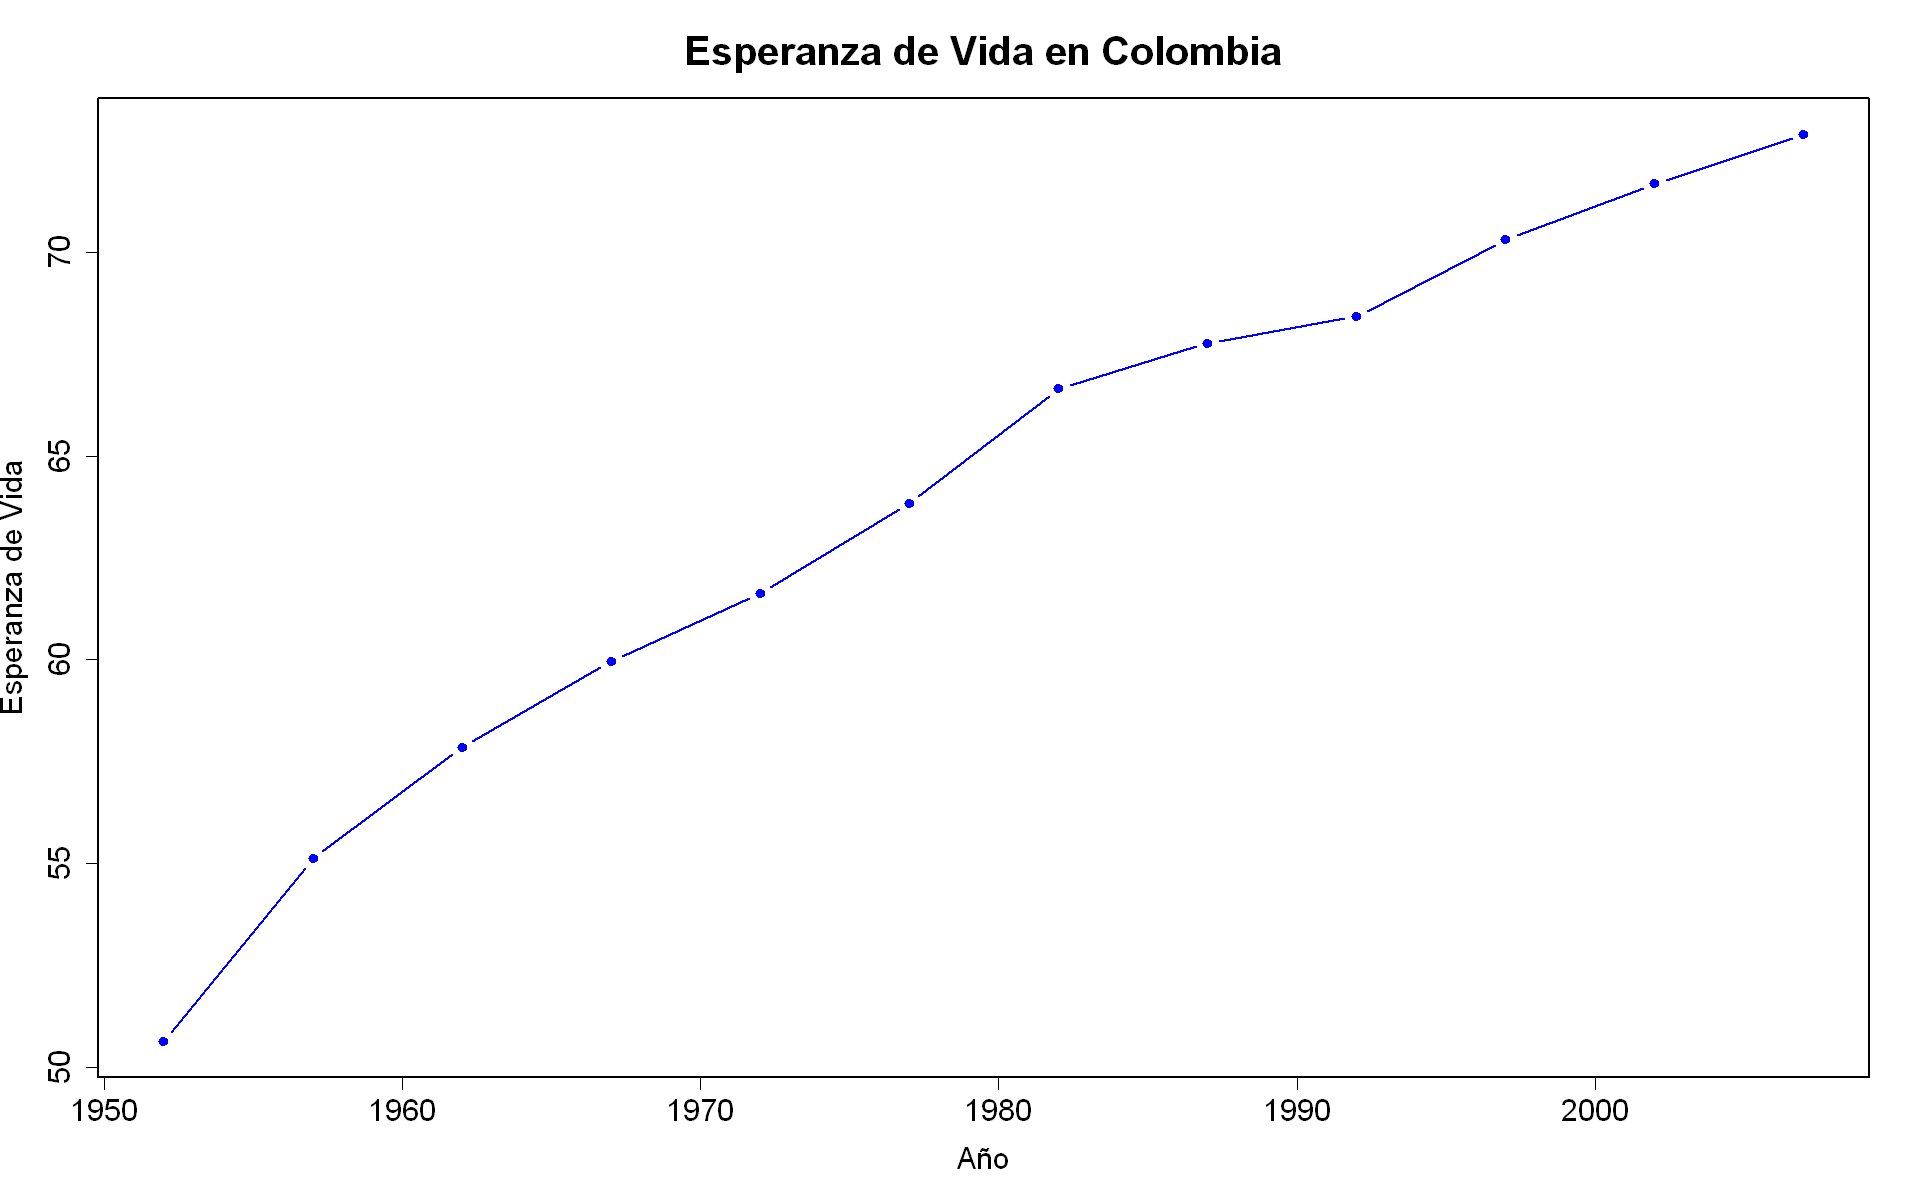

In [3]:
# Configurar tamaño del gráfico (ancho, alto en pulgadas)
options(repr.plot.width = 16, repr.plot.height = 10)

par(bg = "white", 
    mar = c(5, 4, 4, 2) + 0.1, 
    cex.axis = 1.5, 
    cex.lab = 1.5, 
    cex.main = 2, 
    lwd = 2, 
    lty = 1)

plot(lifeExp ~ year, gapminder, subset = country == "Colombia",
     type = "b", 
     xlab = "Año", 
     ylab = "Esperanza de Vida",
     col = "blue", 
     pch = 19, 
     main = "Esperanza de Vida en Colombia")


La esperanza de vida en Colombia experimentó un crecimiento sostenido entre 1952 y 2007, pasando de 50.6 a 72.9 años, reflejando una mejora acumulada de 22.3 años en cinco décadas. El ritmo fue particularmente acelerado en las primeras etapas (1952-1967), con un aumento de casi 10 años, posiblemente vinculado a avances en infraestructura sanitaria y reducción de mortalidad infantil. A partir de los años 90, la tendencia se mantuvo positiva pero más moderada, alcanzando su pico en 2007, lo que sugiere una maduración de políticas públicas y estabilidad socioeconómica. 

In [4]:
# Filtrar los datos para el año 2007
gap <- gapminder[gapminder$year == 2007, ]

# Ver las primeras filas de la base filtrada
head(gap)

country,continent,year,lifeExp,pop,gdpPercap
<fct>,<fct>,<int>,<dbl>,<int>,<dbl>
Afghanistan,Asia,2007,43.828,31889923,974.5803
Albania,Europe,2007,76.423,3600523,5937.0295
Algeria,Africa,2007,72.301,33333216,6223.3675
Angola,Africa,2007,42.731,12420476,4797.2313
Argentina,Americas,2007,75.320,40301927,12779.3796
Australia,Oceania,2007,81.235,20434176,34435.3674


Al interesarnos hacer una muestra la dependencia temporal no nos interesa, dado que lo que queremos es observar un instante en el tiempo como si fuera una **foto** y sobre esta crear nuestro marco muestral, por ello solo se tomaron los datos con año 2007.

In [5]:
dim(gap)

[1] 142   6

lo que indica que la base tiene 142 filas (individuos o países) y 6 columnas (variables).

In [6]:
# Asegurarse de que la base de datos esté accesible
attach(gap)

# Crear la variable ingreso basada en los umbrales de la ONU
gap$ingreso <- as.factor(ifelse(gdpPercap < 1035, 'Bajo',
                         ifelse(gdpPercap < 4085, 'Medio Bajo',
                         ifelse(gdpPercap < 12615, 'Medio Alto', 'Alto'))))

# Ver las primeras filas con la nueva variable
head(gap)

country,continent,year,lifeExp,pop,gdpPercap,ingreso
<fct>,<fct>,<int>,<dbl>,<int>,<dbl>,<fct>
Afghanistan,Asia,2007,43.828,31889923,974.5803,Bajo
Albania,Europe,2007,76.423,3600523,5937.0295,Medio Alto
Algeria,Africa,2007,72.301,33333216,6223.3675,Medio Alto
Angola,Africa,2007,42.731,12420476,4797.2313,Medio Alto
Argentina,Americas,2007,75.320,40301927,12779.3796,Alto
Australia,Oceania,2007,81.235,20434176,34435.3674,Alto


Se crea la variable ingreso de naturaleza cualitativa clasificando por el PIB per capita de cada pais segun los umbrales de la ONU para tener un analisis con posibilidades de segmentaciones y mayor profundidad.

In [7]:
# Resumen general de la base de datos
summary(gap)

        country       continent       year         lifeExp     
 Afghanistan:  1   Africa  :52   Min.   :2007   Min.   :39.61  
 Albania    :  1   Americas:25   1st Qu.:2007   1st Qu.:57.16  
 Algeria    :  1   Asia    :33   Median :2007   Median :71.94  
 Angola     :  1   Europe  :30   Mean   :2007   Mean   :67.01  
 Argentina  :  1   Oceania : 2   3rd Qu.:2007   3rd Qu.:76.41  
 Australia  :  1                 Max.   :2007   Max.   :82.60  
 (Other)    :136                                               
      pop              gdpPercap             ingreso  
 Min.   :1.996e+05   Min.   :  277.6   Alto      :42  
 1st Qu.:4.508e+06   1st Qu.: 1624.8   Bajo      :20  
 Median :1.052e+07   Median : 6124.4   Medio Alto:42  
 Mean   :4.402e+07   Mean   :11680.1   Medio Bajo:38  
 3rd Qu.:3.121e+07   3rd Qu.:18008.8                  
 Max.   :1.319e+09   Max.   :49357.2                  
                                                      

**Análisis del resumen de la base de datos (año 2007):**  
La esperanza de vida (*lifeExp*) muestra *disparidades globales*, con un **mínimo de 39.6 años** (países en crisis) y un **máximo de 82.6 años** (sociedades avanzadas), reflejando *desigualdades en acceso a salud*. La población (*pop*) abarca desde **199,600 habitantes** hasta **1,319 millones**, destacando *contrastes demográficos extremos*.  

- *Distribución por continente*: **África** lidera en registros (52), seguida de **Asia** (33) y **Europa** (30), mientras **Oceanía** solo tiene 2.  
- *Economía*: El **PIB per cápita** varía de **$277** (umbral de pobreza) a **$49,357** (economías desarrolladas), con **61% de países en categorías de ingreso medio** (*Alto/Medio Alto*).  

La **correlación entre PIB y esperanza de vida** se insinúa: países con *ingresos altos* tienden a mayor longevidad, pero *factores regionales* (ej. conflictos en África) alteran esta tendencia.  

In [8]:
# Definir una función para calcular el promedio
promedio <- function(x) {
  sum(x) / length(x)
}

# Calcular el promedio de lifeExp
promedio_lifeExp <- promedio(gap$lifeExp)
print(paste("Promedio de esperanza de vida:", promedio_lifeExp))

# Calcular el promedio de pop
promedio_pop <- promedio(gap$pop)
print(paste("Promedio de población:", promedio_pop))

# Calcular el promedio de gdpPercap
promedio_gdpPercap <- promedio(gap$gdpPercap)
print(paste("Promedio de PIB per cápita:", promedio_gdpPercap))

[1] "Promedio de esperanza de vida: 67.0074225352113"
[1] "Promedio de población: 44021219.5704225"
[1] "Promedio de PIB per cápita: 11680.0718198782"


Aunque summary nos permite ver el promedio de las variables, es posible crearlo de forma manual.

In [9]:
# Calcular el PIB total
gap$gdpTotal <- gap$gdpPercap * gap$pop

# Calcular el PIB per cápita mundial
pib_per_capita_mundial <- sum(gap$gdpTotal) / sum(gap$pop)
print(paste("PIB per cápita mundial:", round(pib_per_capita_mundial, 2)))

[1] "PIB per cápita mundial: 9295.99"


El cálculo **PIB per cápita global ponderado** (*sum(gdpTotal)/sum(pop)*) arroja **$9,295.99**, reflejando un promedio *ajustado por población* y es un ejemplo de una **razón**

In [10]:
# Calcular la media de lifeExp
mean_lifeExp <- mean(gap$lifeExp)
print(paste("Media de esperanza de vida:", round(mean_lifeExp, 2)))

# Calcular el tamaño de la población (número de países)
N <- length(gap$lifeExp)
print(paste("Tamaño de la población (N):", N))

# Calcular percentiles de lifeExp
quantiles_lifeExp <- quantile(gap$lifeExp, c(0.25, 0.5, 0.75))
print("Percentiles 25%, 50%, 75% de esperanza de vida:")
print(quantiles_lifeExp)

# Calcular mínimo y máximo de lifeExp
min_lifeExp <- min(gap$lifeExp)
max_lifeExp <- max(gap$lifeExp)
print(paste("Mínimo de esperanza de vida:", min_lifeExp))
print(paste("Máximo de esperanza de vida:", max_lifeExp))

[1] "Media de esperanza de vida: 67.01"
[1] "Tamaño de la población (N): 142"
[1] "Percentiles 25%, 50%, 75% de esperanza de vida:"
     25%      50%      75% 
57.16025 71.93550 76.41325 
[1] "Mínimo de esperanza de vida: 39.613"
[1] "Máximo de esperanza de vida: 82.603"


Se puede encontrar de mnaera manual y con funciones realtivamente sencillas la misma información dada por `summary`

In [11]:
table(gap$continent, gap$ingreso)

          
           Alto Bajo Medio Alto Medio Bajo
  Africa      1   18         12         21
  Americas    6    0         15          4
  Asia       10    2          8         13
  Europe     23    0          7          0
  Oceania     2    0          0          0

**Europa** domina claramente en países de *ingreso **Alto*** (23 de 30), mientras **África** concentra el 79% de sus naciones en categorías **Bajas/Medio Bajas** (39 de 52), evidenciando una *brecha económica histórica*. **Asia** muestra *heterogeneidad*: 10 países **Altos** (ej. Japón, Corea) vs. 13 en **Medio Bajo** (ej. India, Pakistán). Las **Américas** destacan por ausencia de países **Bajos**, con 15 en **Medio Alto** (México, Brasil) y 6 **Altos** (EE.UU., Canadá). Oceanía, aunque mínima en datos, tiene sus 2 países (Australia/NZ) clasificados como **Altos**, reforzando su perfil desarrollado.  

In [12]:
tapply(lifeExp,continent,promedio)

Africa Americas     Asia   Europe  Oceania 
54.80604 73.60812 70.72848 77.64860 80.71950

In [15]:
xtabs(lifeExp~gap$continent+gap$ingreso)

             gap$ingreso
gap$continent     Alto     Bajo Medio Alto Medio Bajo
     Africa     56.735  910.571    727.653   1154.955
     Americas  461.333    0.000   1109.303    269.567
     Asia      784.191  105.897    566.998    876.954
     Europe   1812.380    0.000    517.078      0.000
     Oceania   161.439    0.000      0.000      0.000

In [18]:
xtabs(lifeExp~continent+gap$ingreso)/table(continent,gap$ingreso)

          gap$ingreso
continent      Alto     Bajo Medio Alto Medio Bajo
  Africa   56.73500 50.58728   60.63775   54.99786
  Americas 76.88883            73.95353   67.39175
  Asia     78.41910 52.94850   70.87475   67.45800
  Europe   78.79913            73.86829           
  Oceania  80.71950                               

- **Europa y Oceanía** lideran en esperanza de vida para ingresos *Altos* (~78.8 y 80.7 años), reflejando sistemas de salud avanzados.  
- **África** muestra las cifras más bajas, incluso en su categoría *Medio Alto* (60.6 años), evidenciando desafíos estructurales.  
- **Américas y Asia** presentan *contrastes*: países de ingreso *Alto* superan los 76 años, mientras los de *Bajo* (ej. algunos asiáticos) caen a ~53 años.  
- **Celdas vacías** (ej. `Bajo` en Américas) confirman ausencia de países en esas categorías, validando datos previos.  

Este análisis revela que **el nivel de ingreso no actúa en aislamiento**: factores regionales (ej. conflictos en África, estabilidad en Europa) modulan su impacto en la longevidad.

In [22]:
Datos07=data.frame(lifeExp,pop,gdpPercap)

In [23]:
cov(Datos07)

,lifeExp,pop,gdpPercap
lifeExp,1.457578e+02,8.475088e+07,105368
pop,8.475088e+07,2.179208e+16,-105694667829
gdpPercap,1.053680e+05,-1.056947e+11,165377988


In [24]:
cor(Datos07)

,lifeExp,pop,gdpPercap
lifeExp,1.00000000,0.04755312,0.6786624
pop,0.04755312,1.00000000,-0.0556756
gdpPercap,0.67866240,-0.05567560,1.0000000


Warning message:
"package 'GGally' was built under R version 4.4.3"
Cargando paquete requerido: ggplot2

Registered S3 method overwritten by 'GGally':
  method from   
  +.gg   ggplot2



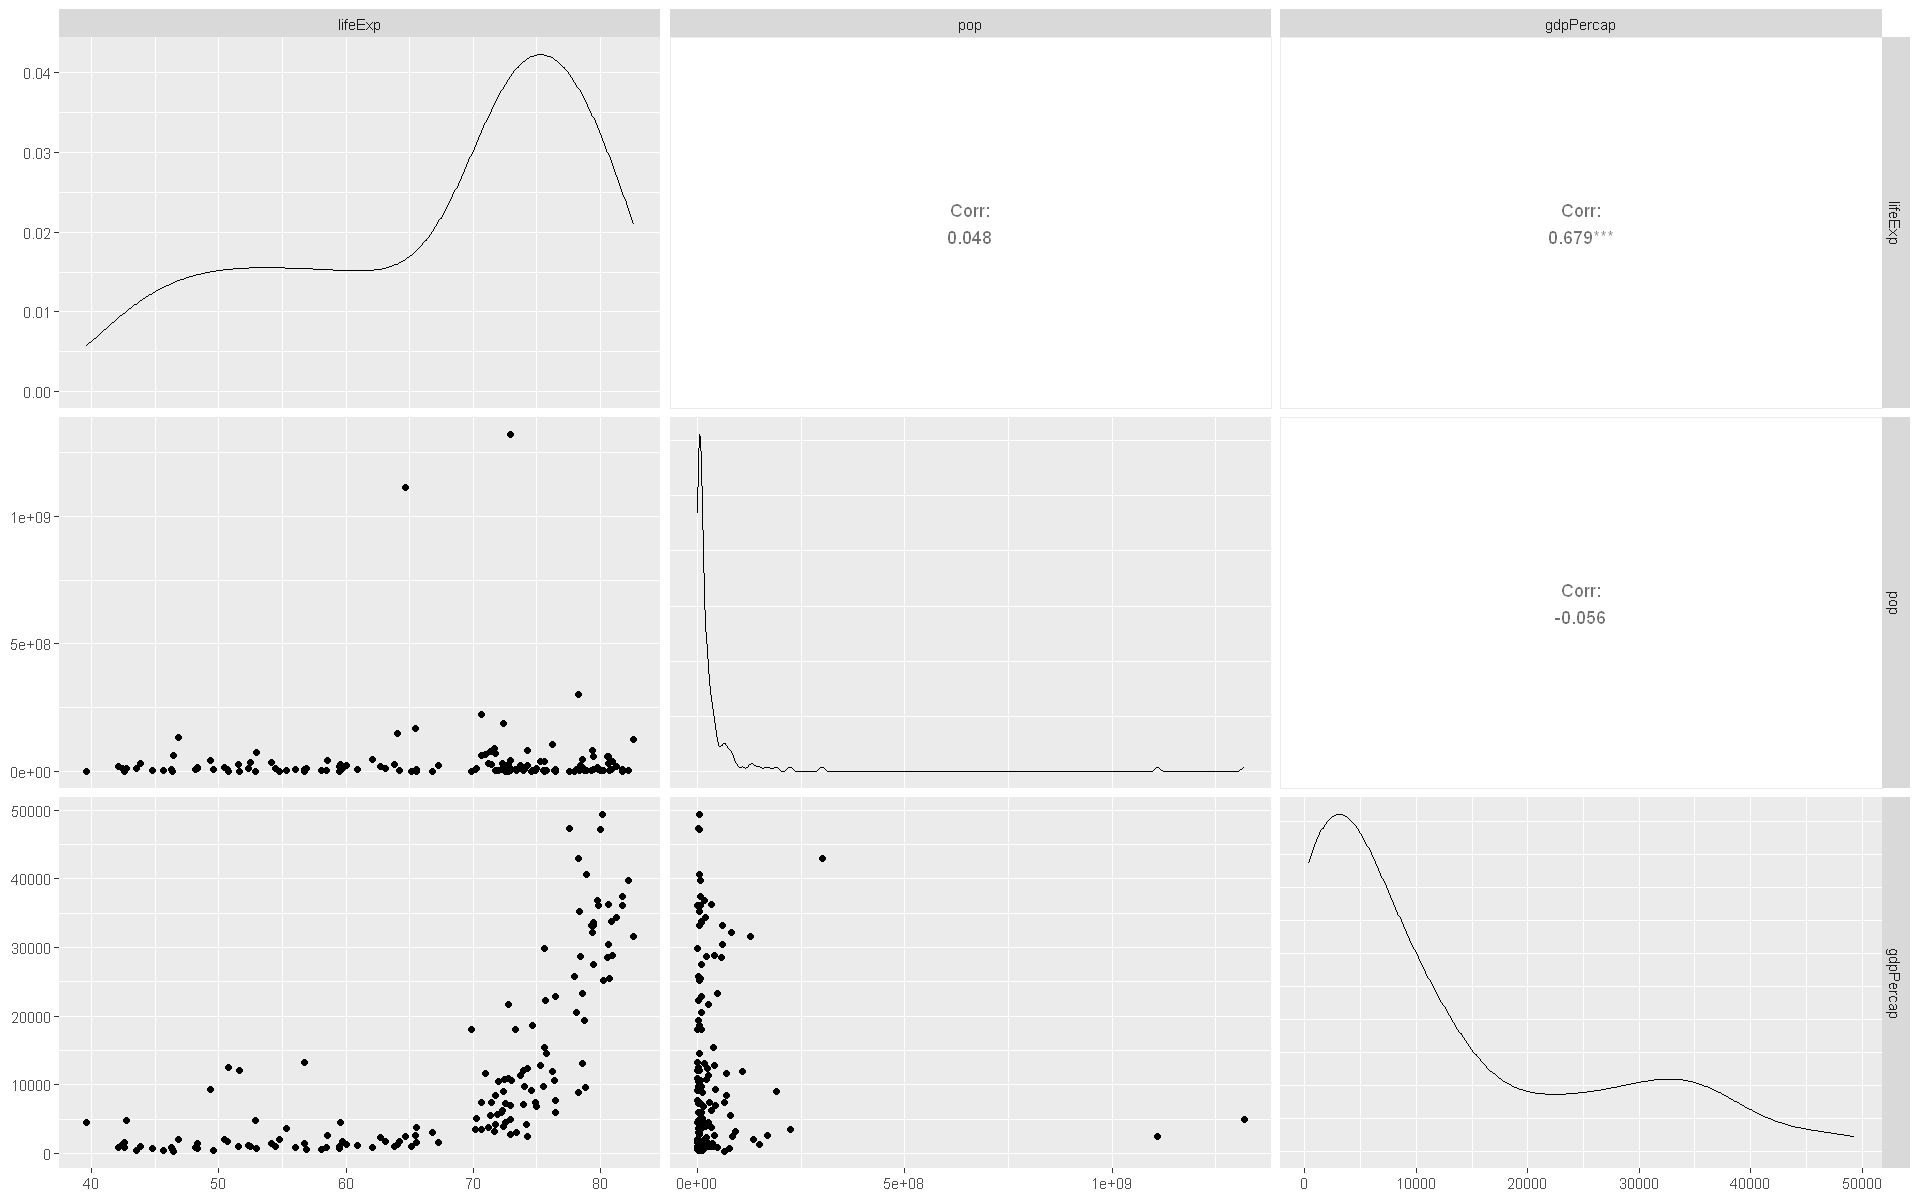

In [26]:
library(GGally)

ggpairs(Datos07)

- Se observa que la **esperanza de vida** tiene una cola pesada a izquierda indicando que son muy pocos los paises que tienen esperanza de vidas bajas mientras el resto se acumula en la parte superior

- la **esperanza de vida** y el **PIB per capita** muestra una correlación considerable lo que tiene sentido dado que a mayor ingreso tiene un pais por persona, se espera que haya mejor ayuda medica y social 

- Como era de esperarse las distribuciones de **poblacion** y **PIB per capita** poseen colas pesadas a la derecha. 

In [27]:
summary(glm(lifeExp~continent+gdpPercap))


Call:
glm(formula = lifeExp ~ continent + gdpPercap)

Coefficients:
                   Estimate Std. Error t value Pr(>|t|)    
(Intercept)       5.374e+01  9.284e-01  57.881  < 2e-16 ***
continentAmericas 1.606e+01  1.662e+00   9.663  < 2e-16 ***
continentAsia     1.267e+01  1.557e+00   8.137 2.27e-13 ***
continentEurope   1.523e+01  1.956e+00   7.786 1.57e-12 ***
continentOceania  1.665e+01  4.974e+00   3.348  0.00105 ** 
gdpPercap         3.466e-04  5.674e-05   6.109 9.89e-09 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for gaussian family taken to be 43.22029)

    Null deviance: 20552  on 141  degrees of freedom
Residual deviance:  5878  on 136  degrees of freedom
AIC: 945.66

Number of Fisher Scoring iterations: 2


**Interpretación del modelo de regresión lineal (GLM) para esperanza de vida:**  

El modelo predice `lifeExp` usando *continente* (vs. África como referencia) y *PIB per cápita*.  

- **Efecto de continente (vs. África):**  
  - *Américas*: **+16.06 años** (p < 0.001).  
  - *Asia*: **+12.67 años** (p < 0.001).  
  - *Europa*: **+15.23 años** (p < 0.001).  
  - *Oceanía*: **+16.65 años** (p = 0.001).  
  → **África tiene la menor esperanza de vida base (intercepto: 53.74 años)**.  

- **PIB per cápita:**  
  Cada **$1000 adicionales** en PIB aportan **+0.35 años** de esperanza de vida (β = 0.0003466, p < 0.001).  

- **Ajuste del modelo:**  
  - Explica **71% de la varianza** (1 - Residual Deviance/Null Deviance = 1 - 5878/20552).  
  - **Todos los predictores son significativos**, pero el continente tiene mayor peso relativo que el PIB.  